In [1]:
import wordcloud

In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
# import pycountry
import re
import string

# from wordcloud import WordCloud
from PIL import Image
nltk.downloader.download('vader_lexicon')
# from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
consumerKey = "CDEyjgEQ3BGXLxN1fuwEgnoIQ"
consumerSecret = "28qzXyKD2Ow2nfASDF5f3pDEEH4HYejPYHf45WrOrbt5cxE6SZ"
accessToken = "1451268525776162816-2fCNixzG6Vc9NtBH68NArRceuNQ3XJ"
accessTokenSecret = "NhWwnhe8sLSllAl5tvPBceUgueSyHwLb37bCxR85Uyc92"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
import datetime as dt

In [21]:
#twitter API
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)

# create a list of records
tweet_list = []

# iterate over each tweet and corresponding user details
for tweet in tweets:
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': tweet.user.name,
        'location': tweet.user.location,
        'verified': tweet.user.verified,
        'description': tweet.user.description
    }
    tweet_list.append(tweet_info)

# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_list)

# display the dataframe
tweets_df.head()

Please enter keyword or hashtag to search: Tesla
Please enter how many tweets to analyze: 1500


,created_at,text,source,name,location,verified,description
0,2022-04-08 17:10:42+00:00,RT @business: Tesla may have a harder time get...,Twitter for iPhone,Sweety,,False,
1,2022-04-08 17:10:42+00:00,"RT @CoinDesk: .@elonmusk, @jack, and @adam3us ...",Twitter for iPhone,Aymen Retibi,"Lincoln, England",False,#Crypto Enthusiast since 2017 - Investor - NFA
2,2022-04-08 17:10:41+00:00,@ATX_fight_club @CYB3RTX Even @fly4dat went lo...,Twitter for Android,🤖Mad HW3 Peasant Mik≡🤖,Germany,False,$TSLA has become Kleenex to the electric vehic...
3,2022-04-08 17:10:41+00:00,@Texan_Shinja East or West #Shinja is the best...,Twitter for iPhone,Piyush Patel,,False,iPhone
4,2022-04-08 17:10:40+00:00,RT @DanielTurnerPTF: Nancy Pelosi’s husband re...,Twitter for iPhone,dogearmy.news,,False,Join the #DOGEARMYCHALLENGE 1million (dogearmy...


In [22]:
tweets_df.drop_duplicates(inplace = True)

In [23]:
#showing Negative, Positive, Neutral and Compound values
tweets_df[["polarity", "subjectivity"]] = tweets_df["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tweets_df["text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
 
    if neg > pos:
        tweets_df.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        tweets_df.loc[index, "sentiment"] = "positive"
    else:
        tweets_df.loc[index, "sentiment"] = "neutral"

    tweets_df.loc[index, "neg"] = neg
    tweets_df.loc[index, "neu"] = neu
    tweets_df.loc[index, "pos"] = pos
    tweets_df.loc[index, "compound"] = comp

tweets_df.head(10)

,created_at,text,source,name,location,verified,description,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-04-08 17:10:42+00:00,RT @business: Tesla may have a harder time get...,Twitter for iPhone,Sweety,,False,,0.125000,0.275000,positive,0.000,0.889,0.111,0.3612
1,2022-04-08 17:10:42+00:00,"RT @CoinDesk: .@elonmusk, @jack, and @adam3us ...",Twitter for iPhone,Aymen Retibi,"Lincoln, England",False,#Crypto Enthusiast since 2017 - Investor - NFA,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,2022-04-08 17:10:41+00:00,@ATX_fight_club @CYB3RTX Even @fly4dat went lo...,Twitter for Android,🤖Mad HW3 Peasant Mik≡🤖,Germany,False,$TSLA has become Kleenex to the electric vehic...,-0.050000,0.400000,neutral,0.000,1.000,0.000,0.0000
3,2022-04-08 17:10:41+00:00,@Texan_Shinja East or West #Shinja is the best...,Twitter for iPhone,Piyush Patel,,False,iPhone,1.000000,0.300000,positive,0.000,0.802,0.198,0.6369
4,2022-04-08 17:10:40+00:00,RT @DanielTurnerPTF: Nancy Pelosi’s husband re...,Twitter for iPhone,dogearmy.news,,False,Join the #DOGEARMYCHALLENGE 1million (dogearmy...,0.150000,0.175000,positive,0.000,0.909,0.091,0.2263
5,2022-04-08 17:10:39+00:00,RT @BTC_Archive: 💥BREAKING: Tesla Block and Bl...,Twitter for Android,Dani,,False,,0.000000,0.000000,negative,0.153,0.847,0.000,-0.4404
6,2022-04-08 17:10:39+00:00,"RT @Reuters: Tesla, Block and Blockstream to m...",Twitter for Android,THE.BLACKSTAR.OF.AFRICA🌐 🏴,Devided States of Africa,False,#iCREATE_iRT_iFB #MetaVerse🌌 #THEBLACKSTAROFAF...,0.000000,0.000000,negative,0.153,0.847,0.000,-0.4404
7,2022-04-08 17:10:39+00:00,@jessica_kirsh @Tesla @elonmusk I’m super jeal...,Twitter for iPhone,Jay,,False,let’s rebuild earth but still go to Mars —-fut...,0.333333,0.666667,positive,0.275,0.367,0.358,0.2263
8,2022-04-08 17:10:38+00:00,RT @MattWallace888: #Dogecon Elon Musk “To The...,Twitter for iPhone,Gabriel,,False,Fun out going smart adventurer responsible fu...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,2022-04-08 17:10:38+00:00,@german_erazo @Tesla Pero TIGO Y CLARO JAMÁS H...,Twitter for iPhone,Kriss Tatum,,False,"Amo y temo a Dios 🥰😍🧐Family ; Básquetbol ,fútb...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [24]:
#Number of Tweets (Total, Positive, Negative, Neutral)
positive = 0
negative = 0
neutral = 0
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

print("total number: ",len(tweets_df))
print(tweets_df.groupby(['sentiment']).size())

total number:  1500
sentiment
negative    359
neutral     619
positive    522
dtype: int64


In [25]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [26]:
STOPWORDS = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz","fucking","rastacake","fuck","dont","doesnt","didnt","ive", "TESLA", "tesla", "Elon", "Musk", "elon", "musk", "elonmusk"]

In [27]:
def remove_stopwords(txt):
    words = txt.split()
    for i, word in enumerate(words):
        if word in STOPWORDS:
            words[i] = " "
    return (" ".join(words))

In [28]:
output_text = []

In [29]:
tweets_df['text']

0       RT @business: Tesla may have a harder time get...
1       RT @CoinDesk: .@elonmusk, @jack, and @adam3us ...
2       @ATX_fight_club @CYB3RTX Even @fly4dat went lo...
3       @Texan_Shinja East or West #Shinja is the best...
4       RT @DanielTurnerPTF: Nancy Pelosi’s husband re...
                              ...                        
1495    RT @teslaownersSV: Sup Texas? Tesla is here @e...
1496    RT @KenzieSigalos: Blockstream &amp; Block are...
1497    @Blockstream @adam3us @CNBC @KenzieSigalos @bl...
1498    RT @verge: Tesla officially opens Texas Gigafa...
1499    RT @PPathole: Say whatever you want, but, Tesl...
Name: text, Length: 1500, dtype: object

In [30]:
for word in tweets_df['text']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  
    cleantextCAP = re.sub(expression, '', cleantextprep) 
    cleantext = cleantextCAP.lower()  
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)

In [31]:
output_text

['  business         harder time   europe   sign       selfdriving           httpstcoljtbtrtod',
 '  coindesk   jack   adamus team     renewable bitcoin mining   texasegreechee reportshttpstcomxtiu',
 'atxfightclub cybrtx   flydat   long       difference     atx       development     httpstcolzrmbqhd',
 'texanshinja east   west shinja           spacex shibnobi shinja httpstcovsctjvjrd',
 '  danielturnerptf nancy pelosis husband   purchased   stock worth millionnow       democrats   pushing elec',
 '  btcarchive breaking   block   blockstream team       bitcoin   solar power   texas',
 '  reuters   block   blockstream     bitcoin   solar power   texas cnbc httpstcotpoeacfy httpstcotoqseomc',
 'jessicakirsh       super jealous',
 '  mattwallace dogecon         moooooooooooooooooooon indeedelonmusk cyberrodeo gigatexas   httpstcoghbw',
 'germanerazo   pero tigo   claro jams han hecho     parque para   pueblo son buenos para meter antenas httpstcouuhnhxukq',
 '    giga texas yall httpstcom

In [32]:
text = ' '.join(output_text)

In [33]:
from wordcloud import WordCloud, STOPWORDS,  ImageColorGenerator

(-0.5, 1199.5, 1199.5, -0.5)

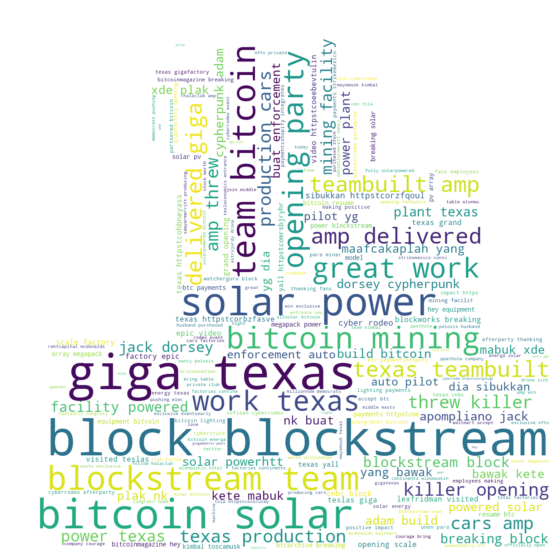

In [34]:
mask = np.array(Image.open("elon_tw.png"))
wordcloud = WordCloud(random_state=1, background_color='white', mask=mask,  stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")